c:\Users\Filip\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking (Masking)               │ (None, 25, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 25, 128)        │        16,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         5,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,986 (85.88 KB)

 Trainable params: 21,986 (85.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 74s 17ms/step - loss: 90.0474
Epoch 2/6
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 64s 16ms/step - loss: 49.1557
Epoch 3/6
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 61s 15ms/step - loss: 31.0364
Epoch 4/6
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 58s 14ms/step - loss: 24.2840
Epoch 5/6
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 60s 15ms/step - loss: 23.5689
Epoch 6/6
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 60s 15ms/step - loss: 23.2828


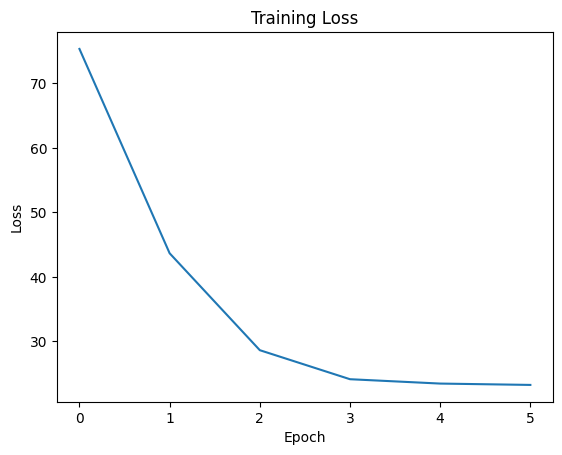

453/453 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 22.9695
Loss: 22.939563751220703
453/453 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import json
import random
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load data
with open('output_data_rnn.json', 'r') as f:
    data = json.load(f)

# Split data into input sequences (X) and output points (Y)
X = []
Y = []
MAX_SEQUENCE_LENGTH = 25  # Set a maximum sequence length for truncation
for i in range(len(data)):
    cut_each_at = random.randint(1, len(data[i]) - 1)
    X_sequence = data[i][:cut_each_at]
    X.append(X_sequence[:MAX_SEQUENCE_LENGTH])  # Truncate to MAX_SEQUENCE_LENGTH if longer
    Y.append(data[i][cut_each_at])

# Pad sequences to the maximum specified length
X_padded = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH, padding='post', dtype='float32')  # Pad with zeros if shorter

# Split into training and testing sets
n = len(X_padded)
n_train = int(0.9 * n)
X_train = X_padded[:n_train]
Y_train = np.array(Y[:n_train])
X_test = X_padded[n_train:]
Y_test = np.array(Y[n_train:])

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Masking(mask_value=0.0, input_shape=(MAX_SEQUENCE_LENGTH, 2)),  # Mask padded values
    tf.keras.layers.SimpleRNN(128, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(32, activation='tanh'),
    tf.keras.layers.Dense(2)  # Output layer with 2 neurons for x, y coordinates
])

model.compile(optimizer='adam', loss='mae')
model.summary()

# Train the model
history = model.fit(X_train, Y_train, epochs=6, batch_size=32)

# Plot the loss
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Evaluate the model
loss = model.evaluate(X_test, Y_test)
print('Loss:', loss)

# Make predictions
Y_pred = model.predict(X_test)


In [ ]:
model.save('../models/rnn_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━

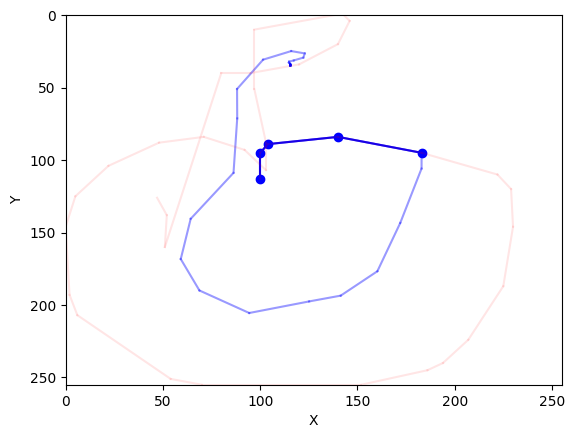

In [4]:
i=len(data)-random.randint(0, 100)
cut_each_at = 5
xes = data[i][:cut_each_at]
yes = data[i][cut_each_at]
xes_array = np.array(xes)
xes_copy = xes_array.copy()
yes_array = np.array(yes)
for j in range(40):
    xes_array_reshaped = xes_array.reshape(1, xes_array.shape[0], xes_array.shape[1])
    y_pred = model.predict(xes_array_reshaped)
    y_pred_expanded = np.expand_dims(y_pred[0], axis=0)
    xes_array = np.append(xes_array, y_pred_expanded, axis=0)

# plt.scatter(xes_array[:, 0], xes_array[:, 1], c="blue", alpha=0.4)
plt.scatter(xes_copy[:, 0], xes_copy[:, 1],  c="blue", alpha=1)
real_data = np.array(data[i])
# plt.scatter(real_data[:, 0], real_data[:, 1], c="red", alpha=0.1)
# plot connected xes_array points
for j in range(xes_array.shape[0] - 1):
    plt.plot([xes_array[j, 0], xes_array[j + 1, 0]], [xes_array[j, 1], xes_array[j + 1, 1]], c="blue", alpha=0.4)
# plot connected xes_copy points
for j in range(xes_copy.shape[0] - 1):
    plt.plot([xes_copy[j, 0], xes_copy[j + 1, 0]], [xes_copy[j, 1], xes_copy[j + 1, 1]], c="blue", alpha=1)
# plot connected real_data points
for j in range(real_data.shape[0] - 1):
    plt.plot([real_data[j, 0], real_data[j + 1, 0]], [real_data[j, 1], real_data[j + 1, 1]], c="red", alpha=0.1)

plt.xlabel("X")
plt.ylabel("Y")

plt.xlim(0, 255)
plt.ylim(0, 255)
plt.gca().invert_yaxis()
plt.show()